# Jonathan Halverson
# Tuesday, December 19, 2017
# Simple RNN for time series

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

Temperature data and logistic regression, create RNN from base API commands. This is an unusual example in that the number of inputs per output is 1. In real cases one would have multiple inputs corresponding to a single output.

In [2]:
n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

In [3]:
import numpy as np
import tensorflow as tf

In [4]:
X = tf.placeholder(dtype=tf.float32, shape=(None, n_steps, n_inputs))
y = tf.placeholder(dtype=tf.float32, shape=(None, n_steps, n_outputs))

In [5]:
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
cell = tf.contrib.rnn.OutputProjectionWrapper(basic_cell, output_size=n_outputs)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [6]:
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
training_op = optimizer.minimize(loss)

In [7]:
init = tf.global_variables_initializer()

In [8]:
t = np.linspace(0, 30, num=300)
f = t * np.sin(t) / 3.0 + 2.0 * np.sin(5.0 * t)

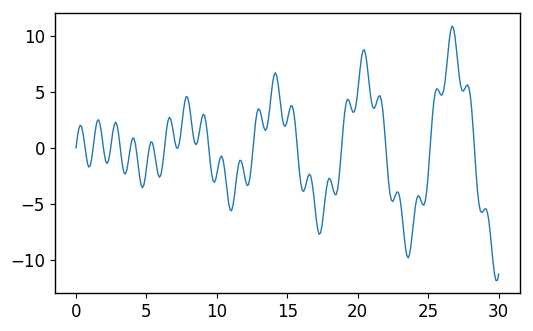

In [9]:
plt.plot(t, f)

In [10]:
def fetch_batch(batch_size):
     # could be done with numpy vector operations (see Geron)
     a_batch = []
     b_batch = []
     for _ in range(batch_size):
          rnd_index = np.random.choice(np.arange(1, 280))
          a_batch.append(f[rnd_index - 1: rnd_index + n_steps - 1].reshape(-1, 1))
          b_batch.append(f[rnd_index: rnd_index + n_steps].reshape(-1, 1))
     return np.asarray(a_batch), np.asarray(b_batch)

In [11]:
n_iterations = 1500
with tf.Session() as sess:
     init.run()
     for iteration in range(n_iterations + 1):
          X_batch, y_batch = fetch_batch(batch_size=50)
          sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
          if iteration % 100 == 0:
               mse = loss.eval(feed_dict={X:X_batch, y:y_batch})
               print(iteration, "  MSE:", mse)
     idx = 100
     X_new = f[idx:idx + n_steps].reshape(1, n_steps, 1)
     X_target = f[idx + 1:idx + n_steps + 1]
     y_pred = sess.run(outputs, feed_dict={X:X_new})

(0, '  MSE:', 12.088454)
(100, '  MSE:', 0.4522478)
(200, '  MSE:', 0.22146113)
(300, '  MSE:', 0.083604775)
(400, '  MSE:', 0.056470275)
(500, '  MSE:', 0.054936532)
(600, '  MSE:', 0.0419413)
(700, '  MSE:', 0.051209681)
(800, '  MSE:', 0.056302369)
(900, '  MSE:', 0.048561051)
(1000, '  MSE:', 0.046057228)
(1100, '  MSE:', 0.049067501)
(1200, '  MSE:', 0.044705495)
(1300, '  MSE:', 0.037135743)
(1400, '  MSE:', 0.048090156)
(1500, '  MSE:', 0.04308477)


In [12]:
print outputs.shape, states.shape

(?, 20, 1) (?, 100)


In [13]:
y_pred.shape

(1, 20, 1)

In [14]:
X_new = np.squeeze(X_new)
y_pred = np.squeeze(y_pred)

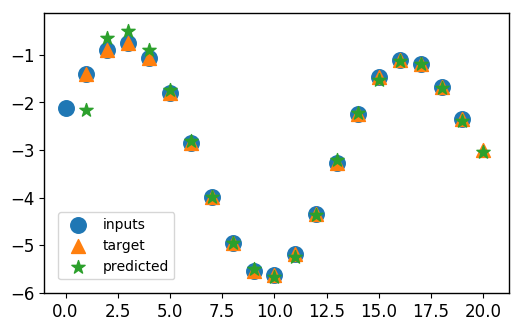

In [15]:
plt.scatter(np.arange(n_steps), X_new, marker='o', s=125, label='inputs')
plt.scatter(np.arange(n_steps) + 1, X_target, marker='^', s=100, label='target')
plt.scatter(np.arange(n_steps) + 1, y_pred, marker='*', s=100, label='predicted')
plt.legend()

# Below we work with real temperature data

The records consist of the mean temperature in Boston for each week over a 30-week period (n_steps). The target is the mean temperature the week after the window or the 31st week. Our training data are intervals taken over a 5 year period or 261 weeks.

In [16]:
import pandas as pd

In [17]:
bos_wthr = pd.read_csv('../project_boston_restaurants/data/boston_weather_2015_2011.csv', parse_dates=['EST'])
bos_wthr.head(3).transpose()

,0,1,2
EST,2015-01-01 00:00:00,2015-01-02 00:00:00,2015-01-03 00:00:00
Max TemperatureF,33,41,37
Mean TemperatureF,28,36,30
Min TemperatureF,22,31,22
Max Dew PointF,16,17,36
MeanDew PointF,8,15,20
Min DewpointF,5,11,8
Max Humidity,53,53,100
Mean Humidity,43,45,72
Min Humidity,32,37,43


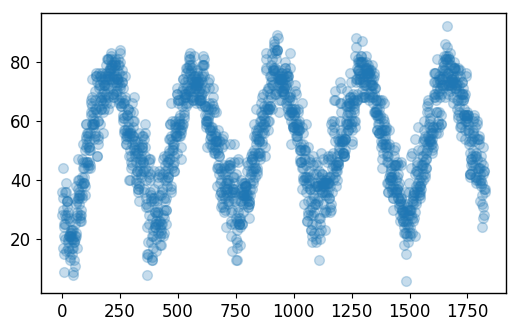

In [19]:
plt.scatter(bos_wthr.index, bos_wthr['Mean TemperatureF'], alpha=0.25)

Let's create a simple ML regression model to predict temperature the next week based on the mean temperature the previous n weeks.

#### Aside on applying the FFT to the temperature data

In [20]:
t = np.arange(bos_wthr.index.size)
syn = 45.0 * (np.sin(t/65.0) + 1.0)

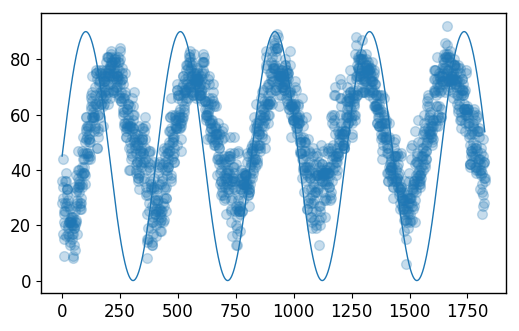

In [21]:
plt.scatter(bos_wthr.index, bos_wthr['Mean TemperatureF'], alpha=0.25)
plt.plot(t, syn)

In [56]:
Fs = 1.0 # one sample per week
T = 1.0 / Fs # one week per sample
L = 1826 # total number of samples
t = np.arange(0, L) * T

In [57]:
t[-5:]

array([ 1821.,  1822.,  1823.,  1824.,  1825.])

In [58]:
Y = np.fft.fft(bos_wthr['Mean TemperatureF'])
P2 = np.abs(Y / L)
P1 = P2[1:L/2+1]
P1 = 2.0 * P1[2:-1]

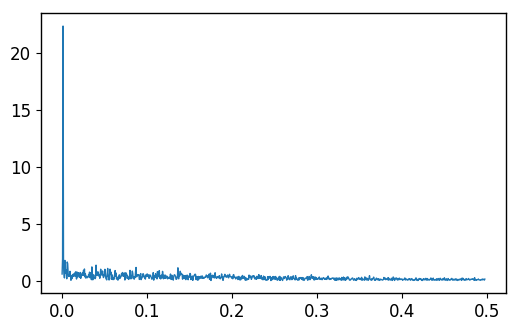

In [59]:
plt.plot(Fs * np.arange(0, (L/2)-3)/L, P1)

/Users/jhalverson/software/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':
/Users/jhalverson/software/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


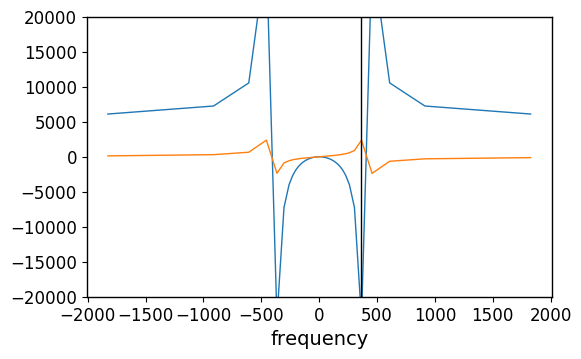

In [89]:
plt.plot(1/np.fft.fftfreq(t.size, d=1.0), np.fft.fft(syn).real)
plt.plot(1/np.fft.fftfreq(t.size, d=1.0), np.fft.fft(syn).imag)
plt.axvline(365.0, c='k')
plt.ylim(-20000, 20000)
#plt.xlim(0, 0.01)
plt.xlabel('frequency')

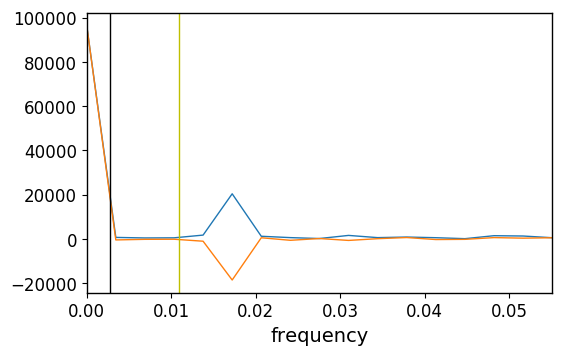

In [161]:
w = 2.0 * np.pi * np.arange(1826) / 1826.0
#plt.plot(np.fft.fftfreq(1826, d=1.0), np.fft.fft(bos_wthr['Mean TemperatureF']).real)
#plt.plot(np.fft.fftfreq(1826, d=1.0), np.fft.fft(bos_wthr['Mean TemperatureF']).imag)
plt.plot(w, np.abs(np.fft.fft(bos_wthr['Mean TemperatureF'])))
plt.plot(w, np.fft.fft(bos_wthr['Mean TemperatureF']).real)

plt.axvline(1.0 / 365.0, c='k')
plt.axvline(4.0 / 365.0, c='y')
#plt.ylim(-20000, 20000)
plt.xlim(0.0, 0.055)
plt.xlabel('frequency')

In [109]:
t = np.linspace(0, 0.5, num=500)
F = np.cos(20 * np.pi * t) + 2 * np.cos(40 * np.pi * t) + 3 * np.cos(60 * np.pi * t) + 4 * np.cos(80 * np.pi * t) + 5 * np.cos(100 * np.pi * t)

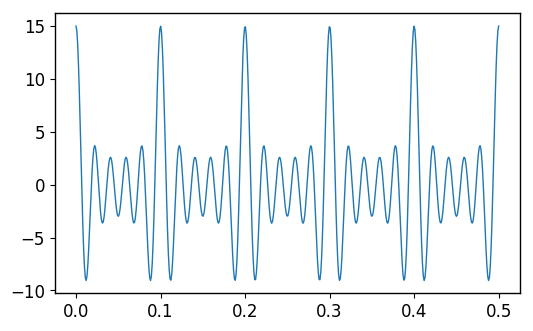

In [110]:
plt.plot(t, F)

/Users/jhalverson/software/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


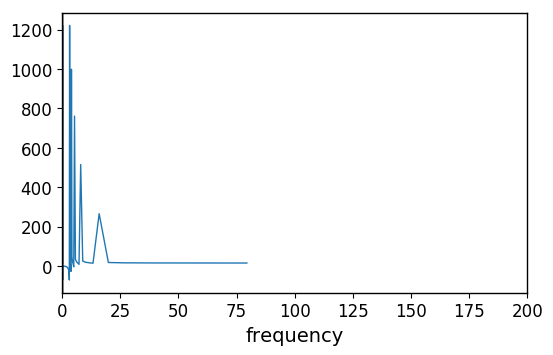

In [135]:
plt.plot(1/(2*np.pi*t), np.fft.fft(F).real)
#plt.plot(1/t, np.fft.fft(F).imag)
#plt.plot(1/t, np.abs(F))
plt.axvline(1.0 / 365.0, c='k')
plt.axvline(4.0 / 365.0, c='k')
#plt.ylim(-20000, 20000)
plt.xlim(0.0, 200)
plt.xlabel('frequency')

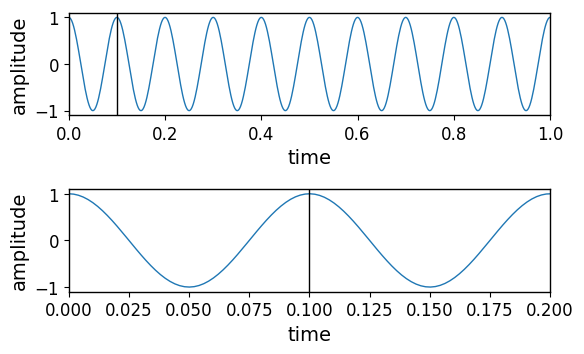

In [148]:
t_min, t_max = 0.0, 1.0
t = np.linspace(t_min, t_max, num=500)
y = np.cos(20 * np.pi * t)

plt.subplot(211)
plt.plot(t, y)
plt.xlim(0, 1.0)
plt.axvline(1.0 / 10, c='k')
plt.xlabel('time')
plt.ylabel('amplitude')

plt.subplot(212)
plt.plot(t, y)
plt.xlim(0, 0.2)
plt.axvline(1.0 / 10, c='k')
plt.xlabel('time')
plt.ylabel('amplitude')

plt.tight_layout()

The period is 0.1 so the frequency is 10.

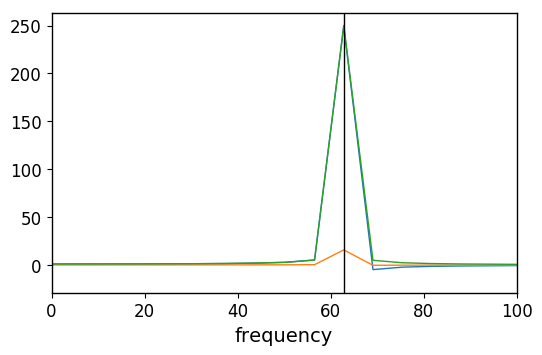

In [154]:
#plt.plot(np.arange(t.size) / (t.size * (t_max - t_min)), np.fft.fft(y).real)
#plt.plot(1/t, np.fft.fft(y).imag)
#plt.plot(1/t, np.abs(y))
w = 2.0 * np.pi * np.arange(t.size) / (t_max - t_min)
plt.plot(w, np.fft.fft(y).real)
plt.plot(w, np.fft.fft(y).imag)
plt.plot(w, np.abs(np.fft.fft(y)))

plt.axvline(20 * np.pi, c='k')
#plt.axvline(4.0 / 365.0, c='k')
#plt.ylim(-20000, 20000)
plt.xlim(0.0, 100)
plt.xlabel('frequency')

#### Frequency spectrum

In [22]:
bos_wthr.shape[0]

1826

In [23]:
bos_wthr.index.max()

1825

In [24]:
T = 1.0 * bos_wthr.index.max()
N = bos_wthr.shape[0] / 2 # half the total number of points
dx = pd.DataFrame({'k':range(0, 2 * N)})
dx['w'] = 2.0 * np.pi * dx.k / T
dx['t_k'] = dx.k * T / (2.0 * N)
dx['Temperature'] = 1.0 * bos_wthr['Mean TemperatureF'].copy()

In [37]:
dx.head()

,k,w,t_k,Temperature
0,0,0.000000,0.000000,28.0
1,1,0.003443,0.999452,36.0
2,2,0.006886,1.998905,30.0
3,3,0.010329,2.998357,44.0
4,4,0.013771,3.997809,34.0


In [38]:
dx.tail()

,k,w,t_k,Temperature
1821,1821,6.269414,1820.002738,43.0
1822,1822,6.272857,1821.002191,43.0
1823,1823,6.276300,1822.001643,28.0
1824,1824,6.279742,1823.001095,36.0
1825,1825,6.283185,1824.000548,37.0


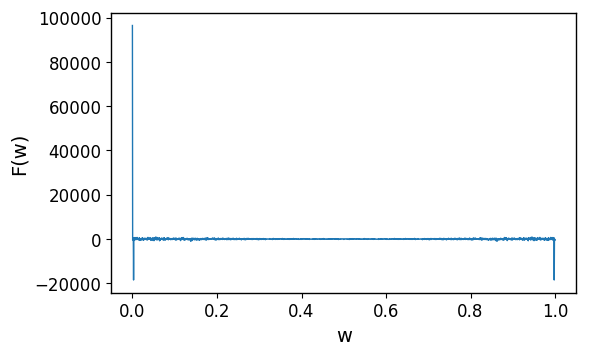

In [26]:
plt.plot(dx.w / (2 * np.pi), np.fft.fft(dx.Temperature).real)
#plt.xlim(80, 100)
plt.xlabel('w')
plt.ylabel('F(w)')

In [27]:
w = 0.0025
1/w/6.28, 365/4.0

(63.69426751592356, 91.25)

In [28]:
1/91.25

0.010958904109589041

In [29]:
1/w,6.28/w,1/w/6.28

(400.0, 2512.0, 63.69426751592356)

(0, 100)

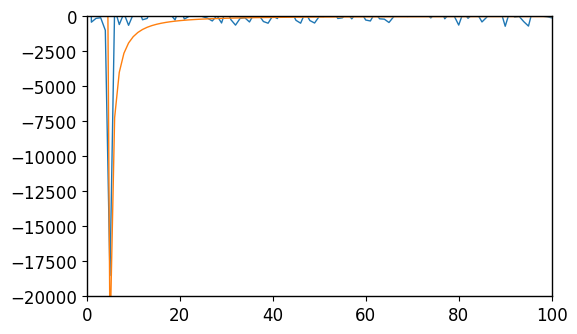

In [30]:
plt.plot(np.fft.fft(bos_wthr['Mean TemperatureF']).real)
plt.plot(np.fft.fft(syn).real)
plt.ylim(-20000, 0)
plt.xlim(0, 100)

In [31]:
N = dx.Temperature.index.size
Xk = []
for k in range(0, N):
     summ = 0.0 + 0.0j
     for n in range(0, N):
          summ += bos_wthr['Mean TemperatureF'][n] * np.exp(-1j * 2.0 * np.pi * k * n / float(N))
     Xk.append(summ)

In [32]:
Ak = np.fft.fft(bos_wthr['Mean TemperatureF'])
np.allclose(Xk, Ak)

True

In [33]:
Ak.real

array([ 96444.        ,   -417.71113508,   -145.13264544, ...,
         -100.53121032,   -145.13264544,   -417.71113508])

In [34]:
np.abs(Ak)

array([ 96444.        ,    719.33336   ,    475.0062396 , ...,
          532.54252986,    475.0062396 ,    719.33336   ])

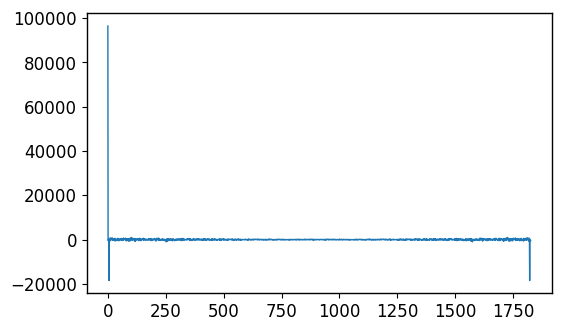

In [35]:
plt.plot([u.real for u in Xk])

In [36]:
Fw = []
for w in df.w:
     sumt = 0.0 + 0.0j
     for k in df.k:
          t_k = k * T / (2 * N)
          sumt += F(t_k) * np.exp(1j * w * t_k)
     Fw.append(sumt / 2.0 / N)

NameError: name 'df' is not defined

Compute the mean temperature for each week over the five year period:

In [ ]:
bos_wthr['week'] = bos_wthr.index / 7
T_week = bos_wthr.groupby('week')['Mean TemperatureF'].mean()

In [ ]:
plt.scatter(bos_wthr.index, bos_wthr['Mean TemperatureF'], alpha=0.25, label='Daily')
plt.scatter(T_week.index * 7, T_week.values, label='Weekly')
plt.xlabel('Day index')
plt.ylabel('Temperature (F)')
plt.legend()

In [ ]:
n_steps = 30
def get_features_and_target(batch_size):
     n = T_week.size
     arr = []
     for _ in xrange(batch_size):
          rand_idx = np.random.choice(np.arange(0, n - n_steps - 1))
          arr.append(T_week[rand_idx:rand_idx + n_steps + 1]) # last value is the target
     return np.array(arr)

In [ ]:
train = get_features_and_target(batch_size=35)
test = get_features_and_target(batch_size=20)

In [ ]:
col_names = ['week_' + str(i) for i in range(n_steps)] + ['target']
df_train = pd.DataFrame(train, columns=col_names)
df_test = pd.DataFrame(test, columns=col_names)

In [ ]:
plt.plot(df_train.iloc[0].values, marker='o')
plt.plot(df_train.iloc[1].values, marker='o')
plt.plot(df_train.iloc[2].values, marker='o')
plt.xlabel('Week index')
plt.ylabel('Temperature (F)')
plt.title('Three training instances')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linreg = LinearRegression()
linreg = linreg.fit(df_train.iloc[:,:-1], df_train.target)
print "rmse =", np.sqrt(mean_squared_error(df_test.target, linreg.predict(df_test.iloc[:,:-1])))
print "R2 =", r2_score(df_test.target, linreg.predict(df_test.iloc[:,:-1]))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=20)
rf = rf.fit(df_train.iloc[:,:-1], df_train.target)
print "rmse =", np.sqrt(mean_squared_error(df_test.target, rf.predict(df_test.iloc[:,:-1])))
print "R2 =", r2_score(df_test.target, rf.predict(df_test.iloc[:,:-1]))